# School District Boundary Data

1. map to see the shapes we currently have
2. join district ID's to the school district boundary data by the OBJECTID attribute
3. dissolve the shapes according to the district ID
4. join the school policing data to the school district boundary data by the district ID attribute

## Mapping what we have

In [49]:
import geopandas as gpd
import pandas as pd

import folium

In [50]:
# import the school expulsion data including geodataframe
gdf_district = gpd.read_file('School_District_Boundaries.geojson')


In [51]:
gdf_district.head()

OBJECTID                                           DISTRICT UNIFIED  \
0         1   ANTELOPE VALLEY UNION HIGH / EASTSIDE UNION ELEM           
1         2          ANTELOPE VALLEY UNION HIGH/LANCASTER ELEM           
2         3     ANTELOPE VALLEY UNION HIGH / GORMAN ELEMENTARY           
3         4     ANTELOPE VALLEY UNION HIGH/WESTSIDE UNION ELEM           
4         5  ANTELOPE VALLEY UNION HIGH/HUGHES-ELIZABETH LA...           

                         HIGH                   ELEMENTARY            PH  \
0  ANTELOPE VALLEY UNION HIGH    EASTSIDE UNION ELEMENTARY  661 946 2813   
1  ANTELOPE VALLEY UNION HIGH         LANCASTER ELEMENTARY  805 948 4661   
2  ANTELOPE VALLEY UNION HIGH            GORMAN ELEMENTARY  805 248 6411   
3  ANTELOPE VALLEY UNION HIGH    WESTSIDE UNION ELEMENTARY  805 948 2669   
4  ANTELOPE VALLEY UNION HIGH  HUGHES-ELIZABETH LAKES ELEM  805 724 1234   

                                  ADDR        PH2 PH3      TBM    STU  \
0      6742 E AVENUE H LANCASTER 93535                 4017 E2   2211   
1     44711 N CEDAR AV LANCASTER 93534                 4015 H6  13300   
2  49847 GORMAN SCHOOL RD GORMAN 93243                    viii    125   
3    46809 N 70TH ST W LANCASTER 93536                 4014 D1   6172   
4  16633 ELIZABETH LAKE RD LAKE HUGHES  93532 zip      4102 B3    500   

                            HI_ADDR         HI_PH HI_STU  \
0  44811 SIERRA HWY LANCASTER 93534  805 948 7655  14638   
1  44811 SIERRA HWY LANCASTER 93534  805 948 7655  14638   
2  44811 SIERRA HWY LANCASTER 93534  805 948 7655  14638   
3  44811 SIERRA HWY LANCASTER 93534  805 948 7655  14638   
4  44811 SIERRA HWY LANCASTER 93534  805 948 7655  14638   

                                               LABEL   ShapeSTArea  \
0  ANTELOPE VALLEY UNION HIGH\nEASTSIDE UNION ELE...  7.089085e+09   
1   ANTELOPE VALLEY UNION HIGH\nLANCASTER ELEMENTARY  2.350519e+09   
2      ANTELOPE VALLEY UNION HIGH\nGORMAN ELEMENTARY  4.254966e+09   
3  ANTELOPE VALLEY UNION HIGH\nWESTSIDE UNION ELE...  8.778575e+09   
4  ANTELOPE VALLEY UNION HIGH\nHUGHES-ELIZABETH L...  3.117251e+09   

   ShapeSTLength                                           geometry  
0  395897.413510  POLYGON ((-118.04148 34.82193, -118.04139 34.8...  
1  245311.251964  POLYGON ((-118.16691 34.82050, -118.16689 34.8...  
2  283818.989449  POLYGON ((-118.69161 34.81679, -118.69973 34.8...  
3  607628.689745  POLYGON ((-118.69161 34.81679, -118.69146 34.8...  
4  285691.105148  POLYGON ((-118.62535 34.72938, -118.62599 34.7...

In [52]:
gdf_district.tail()

OBJECTID                      DISTRICT                       UNIFIED HIGH  \
78        79       HERMOSA BEACH CITY ELEM                                      
79        80      PARAMOUNT UNIFIED SCHOOL      PARAMOUNT UNIFIED SCHOOL        
80        81  PALOS VERDES PENINSULA U SCH  PALOS VERDES PENINSULA U SCH        
81        82     LONG BEACH UNIFIED SCHOOL     LONG BEACH UNIFIED SCHOOL        
82        83                          None                          None        

                 ELEMENTARY            PH  \
78  HERMOSA BEACH CITY ELEM  310 937 5877   
79                           562 602 6011   
80                           310 378 9966   
81                           562 997 8000   
82                                          

                                   ADDR             PH2 PH3      TBM    STU  \
78     1645 VALLEY DR HERMOSA BCH 90254                       762 H2    950   
79  15110 CALIFORNIA AV PARAMOUNT 90723    562 602 6000       735 H4  15843   
80  3801 VIA LA SELVA P V ESTATES 90274        x5 super       793 B3   9180   
81      1515 HUGHES WY LONG BEACH 90810  562 997 8101po      5923 G4  83536   
82                                                                            

   HI_ADDR HI_PH HI_STU                         LABEL   ShapeSTArea  \
78                            HERMOSA BEACH CITY ELEM  4.101174e+07   
79                           PARAMOUNT UNIFIED SCHOOL  5.548641e+06   
80                       PALOS VERDES PENINSULA U SCH  6.775624e+08   
81                          LONG BEACH UNIFIED SCHOOL  2.088236e+09   
82                         LOS ANGELES UNIFIED SCHOOL  1.527262e+09   

    ShapeSTLength                                           geometry  
78   28597.155049  POLYGON ((-118.40958 33.87700, -118.40950 33.8...  
79    9385.591838  POLYGON ((-118.15994 33.86016, -118.16317 33.8...  
80  124356.115871  POLYGON ((-118.39485 33.80420, -118.39551 33.8...  
81  325127.491221  POLYGON ((-118.49711 33.44152, -118.49750 33.4...  
82  290539.450098  POLYGON ((-118.60720 33.04238, -118.60724 33.0...

In [53]:
# notice the final entry doesn't have a district name. Let's delete it.
gdf_district.drop(labels=82,inplace=True)
gdf_district.tail()

OBJECTID                      DISTRICT                       UNIFIED HIGH  \
77        78     LONG BEACH UNIFIED SCHOOL     LONG BEACH UNIFIED SCHOOL        
78        79       HERMOSA BEACH CITY ELEM                                      
79        80      PARAMOUNT UNIFIED SCHOOL      PARAMOUNT UNIFIED SCHOOL        
80        81  PALOS VERDES PENINSULA U SCH  PALOS VERDES PENINSULA U SCH        
81        82     LONG BEACH UNIFIED SCHOOL     LONG BEACH UNIFIED SCHOOL        

                 ELEMENTARY            PH  \
77                           562 997 8000   
78  HERMOSA BEACH CITY ELEM  310 937 5877   
79                           562 602 6011   
80                           310 378 9966   
81                           562 997 8000   

                                   ADDR             PH2 PH3      TBM    STU  \
77      1515 HUGHES WY LONG BEACH 90810  562 997 8101po       765 B6  83536   
78     1645 VALLEY DR HERMOSA BCH 90254                       762 H2    950   
79  15110 CALIFORNIA AV PARAMOUNT 90723    562 602 6000       735 H4  15843   
80  3801 VIA LA SELVA P V ESTATES 90274        x5 super       793 B3   9180   
81      1515 HUGHES WY LONG BEACH 90810  562 997 8101po      5923 G4  83536   

   HI_ADDR HI_PH HI_STU                         LABEL   ShapeSTArea  \
77                          LONG BEACH UNIFIED SCHOOL  1.991402e+09   
78                            HERMOSA BEACH CITY ELEM  4.101174e+07   
79                           PARAMOUNT UNIFIED SCHOOL  5.548641e+06   
80                       PALOS VERDES PENINSULA U SCH  6.775624e+08   
81                          LONG BEACH UNIFIED SCHOOL  2.088236e+09   

    ShapeSTLength                                           geometry  
77  244016.275942  POLYGON ((-118.16317 33.86016, -118.15994 33.8...  
78   28597.155049  POLYGON ((-118.40958 33.87700, -118.40950 33.8...  
79    9385.591838  POLYGON ((-118.15994 33.86016, -118.16317 33.8...  
80  124356.115871  POLYGON ((-118.39485 33.80420, -118.39551 33.8...  
81  325127.491221  POLYGON ((-118.49711 33.44152, -118.49750 33.4...

In [54]:
gdf_district.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 82 entries, 0 to 81
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       82 non-null     int64   
 1   DISTRICT       82 non-null     object  
 2   UNIFIED        82 non-null     object  
 3   HIGH           82 non-null     object  
 4   ELEMENTARY     82 non-null     object  
 5   PH             82 non-null     object  
 6   ADDR           82 non-null     object  
 7   PH2            82 non-null     object  
 8   PH3            82 non-null     object  
 9   TBM            82 non-null     object  
 10  STU            82 non-null     object  
 11  HI_ADDR        82 non-null     object  
 12  HI_PH          82 non-null     object  
 13  HI_STU         82 non-null     object  
 14  LABEL          82 non-null     object  
 15  ShapeSTArea    82 non-null     float64 
 16  ShapeSTLength  82 non-null     float64 
 17  geometry       82 non-null   

In [55]:
# only keep necessary columns
columns_to_keep = ['OBJECTID', 'DISTRICT', 'geometry']
gdf_district = gdf_district[columns_to_keep]
gdf_district.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 82 entries, 0 to 81
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJECTID  82 non-null     int64   
 1   DISTRICT  82 non-null     object  
 2   geometry  82 non-null     geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 2.6+ KB


In [56]:
# Set the CRS
gdf_district.set_crs(epsg=4326, inplace=True)
gdf_district.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

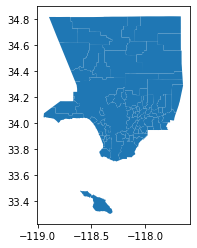

In [57]:
# simple plot of the data
gdf_district.plot()

Now create an interactive folium map!

In [58]:
m = folium.Map(location=[34.2,-118.2], 
               zoom_start = 9,
               tiles='CartoDB positron', 
               attribution='CartoDB')

# we can use the geojson file directly
folium.GeoJson('School_District_Boundaries.geojson', 
               name="geojson",
              tooltip = folium.features.GeoJsonTooltip(fields=['DISTRICT'])
              ).add_to(m)

m


Notice some of the shapes are different parts of the same district, divided by elementary school. I want to give each shape a single district ID and merge them by that attribute.

## Joining District ID's to the data
Comparing to my other school district data, the district names on this shapefile were different. I hand-tagged and uploaded the new CSV.

In [59]:
# load the data from the csv
df_districtID = pd.read_csv('SchoolDistrictID.csv')

In [60]:
# make copies of the dataframes so that it's easier to join them
gdf_district_join = gdf_district
df_districtID_join = df_districtID

# check the size of each dataset
print(gdf_district_join.shape)
print(df_districtID_join.shape)

# merge the datasets
gdf_district_join = gdf_district_join.merge(df_districtID_join, # left dataset = shapes, right dataset = district ID's
                                                    on='OBJECTID', # the column to merge with
                                                    how='left', # use a left outer join, which means all of the entries in expulsions will be preserved
                                                    indicator=True) # create a new column '_merge' that tells us how the merge went

# check the size of each dataset
print(gdf_district_join.shape)
print(df_districtID_join.shape)

(82, 3)
(82, 2)
(82, 5)
(82, 2)


In [61]:
# check how the merge went!
gdf_district_join._merge.value_counts()

both          82
left_only      0
right_only     0
Name: _merge, dtype: int64

In [62]:
# success so far... spot check to see that the values look ok
gdf_district_join.tail()

OBJECTID                      DISTRICT  \
77        78     LONG BEACH UNIFIED SCHOOL   
78        79       HERMOSA BEACH CITY ELEM   
79        80      PARAMOUNT UNIFIED SCHOOL   
80        81  PALOS VERDES PENINSULA U SCH   
81        82     LONG BEACH UNIFIED SCHOOL   

                                             geometry  DistrictCode _merge  
77  POLYGON ((-118.16317 33.86016, -118.15994 33.8...         64725   both  
78  POLYGON ((-118.40958 33.87700, -118.40950 33.8...         64600   both  
79  POLYGON ((-118.15994 33.86016, -118.16317 33.8...         64873   both  
80  POLYGON ((-118.39485 33.80420, -118.39551 33.8...         64865   both  
81  POLYGON ((-118.49711 33.44152, -118.49750 33.4...         64725   both

In [63]:
# drop the unnecessary columns
gdf_district_join = gdf_district_join.drop(labels = ['OBJECTID','_merge'],axis = 'columns')

gdf_district_join.head()

DISTRICT  \
0   ANTELOPE VALLEY UNION HIGH / EASTSIDE UNION ELEM   
1          ANTELOPE VALLEY UNION HIGH/LANCASTER ELEM   
2     ANTELOPE VALLEY UNION HIGH / GORMAN ELEMENTARY   
3     ANTELOPE VALLEY UNION HIGH/WESTSIDE UNION ELEM   
4  ANTELOPE VALLEY UNION HIGH/HUGHES-ELIZABETH LA...   

                                            geometry  DistrictCode  
0  POLYGON ((-118.04148 34.82193, -118.04139 34.8...         64246  
1  POLYGON ((-118.16691 34.82050, -118.16689 34.8...         64246  
2  POLYGON ((-118.69161 34.81679, -118.69973 34.8...         64246  
3  POLYGON ((-118.69161 34.81679, -118.69146 34.8...         64246  
4  POLYGON ((-118.62535 34.72938, -118.62599 34.7...         64246

## Dissolve the shapes based on District ID

In [64]:
gdf_district_dissolve = gdf_district_join.dissolve(by='DistrictCode', aggfunc='first')

gdf_district_dissolve.head()

geometry  \
DistrictCode                                                      
64212         POLYGON ((-118.10778 33.88752, -118.10775 33.8...   
64246         POLYGON ((-117.66736 34.68788, -117.66737 34.6...   
64261         POLYGON ((-118.06749 34.13089, -118.06748 34.1...   
64279         POLYGON ((-117.87150 34.33878, -117.87198 34.3...   
64287         POLYGON ((-117.94300 34.10704, -117.94296 34.1...   

                                                      DISTRICT  
DistrictCode                                                    
64212                                       ABC UNIFIED SCHOOL  
64246         ANTELOPE VALLEY UNION HIGH / EASTSIDE UNION ELEM  
64261                                   ARCADIA UNIFIED SCHOOL  
64279                                     AZUSA UNIFIED SCHOOL  
64287                              BALDWIN PARK UNIFIED SCHOOL

In [65]:
gdf_district_dissolve.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 56 entries, 64212 to 75713
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  56 non-null     geometry
 1   DISTRICT  56 non-null     object  
dtypes: geometry(1), object(1)
memory usage: 3.4+ KB


In [66]:
# download into a new geojson
gdf_district_dissolve.to_file("Districts_dissolved.geojson", driver='GeoJSON')

In [67]:
m = folium.Map(location=[34.2,-118.2], 
               zoom_start = 9,
               tiles='CartoDB positron', 
               attribution='CartoDB')

# we can use the geojson file directly
folium.GeoJson('Districts_dissolved.geojson', 
               name="geojson",
              tooltip = folium.features.GeoJsonTooltip(fields=['DISTRICT'])
              ).add_to(m)

m

## Join the School Policing Data & Correct School District Names

I did some internet research to create a new dataset of school infrastructure. I was inspired by [this report](http://transformschools.ucla.edu/beyond-the-schoolhouse-digging-deeper/school-policing-climate/#notes) which recorded "safety" infrastructure in several LA county school districts with high enrollment of black students.

Here are the columns in the sheet:
* 'DistrictCode' - to use for join
* 'Source' - Website used to. Accessed on 12/4/21.
* 'PoliceInSchools' - Police presence in schools based on the school district website, including school resource officers, school police, or armed campus security. Values are "yes" (if I found evidence) or "unknown" (if I found no evidence).
* 'RandomSearch' - Presence of random search and seizure based on the school district website, including K-9 units. Values are "yes" (if I found evidence) or "unknown" (if I found no evidence).
* 'Notes' - Additional Notes/Sources
* 'DistrictName' - Name of the district as listed in the other CA Department of Education school district dataset

In [68]:
# load the data from the csv
df_districtSafety = pd.read_csv('SchoolDistrictSafety.csv')
df_districtSafety.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DistrictCode     56 non-null     int64 
 1   Source           56 non-null     object
 2   PoliceInSchools  56 non-null     object
 3   RandomSearch     56 non-null     object
 4   Notes            28 non-null     object
 5   DistrictName     56 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.8+ KB


In [69]:
# make copies of the dataframes so that it's easier to join them
gdf_districtSafety_polygon = gdf_district_dissolve

# check the size of each dataset
print(gdf_district_dissolve.shape)
print(gdf_districtSafety_polygon.shape)
print(df_districtSafety.shape)

# merge the datasets
gdf_districtSafety_polygon = gdf_districtSafety_polygon.merge(df_districtSafety, # left dataset = shapes, right dataset = safety data
                                                    on='DistrictCode', # the column to merge with
                                                    how='left', # use a left outer join, which means all of the entries in expulsions will be preserved
                                                    indicator=True) # create a new column '_merge' that tells us how the merge went

# check the size of each dataset
print(gdf_district_dissolve.shape)
print(gdf_districtSafety_polygon.shape)

(56, 2)
(56, 2)
(56, 6)
(56, 2)
(56, 9)


In [70]:
gdf_districtSafety_polygon.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 56 entries, 0 to 55
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   DistrictCode     56 non-null     int64   
 1   geometry         56 non-null     geometry
 2   DISTRICT         56 non-null     object  
 3   Source           56 non-null     object  
 4   PoliceInSchools  56 non-null     object  
 5   RandomSearch     56 non-null     object  
 6   Notes            28 non-null     object  
 7   DistrictName     56 non-null     object  
 8   _merge           56 non-null     category
dtypes: category(1), geometry(1), int64(1), object(6)
memory usage: 4.1+ KB


In [72]:
gdf_districtSafety_polygon._merge.value_counts()

both          56
left_only      0
right_only     0
Name: _merge, dtype: int64

In [73]:
# drop the unnecessary columns
gdf_districtSafety_polygon = gdf_districtSafety_polygon.drop(labels = ['DISTRICT','_merge'],axis = 'columns')

gdf_districtSafety_polygon.head()

DistrictCode                                           geometry  \
0         64212  POLYGON ((-118.10778 33.88752, -118.10775 33.8...   
1         64246  POLYGON ((-117.66736 34.68788, -117.66737 34.6...   
2         64261  POLYGON ((-118.06749 34.13089, -118.06748 34.1...   
3         64279  POLYGON ((-117.87150 34.33878, -117.87198 34.3...   
4         64287  POLYGON ((-117.94300 34.10704, -117.94296 34.1...   

                                              Source PoliceInSchools  \
0  https://www.abcusd.us/apps/pages/index.jsp?uRE...             yes   
1  https://www.antelopevalleyhs.org/about/safety-...         unknown   
2  https://www.ausd.net/apps/pages/safetyprepared...         unknown   
3                             https://www.azusa.org/         unknown   
4                             https://www.bpusd.net/         unknown   

  RandomSearch                          Notes                DistrictName  
0      unknown                            NaN                 ABC Unified  
1      unknown  partnership with sheriff dept  Antelope Valley Union High  
2      unknown                            NaN             Arcadia Unified  
3      unknown    No specific page on website               Azusa Unified  
4      unknown    No specific page on website        Baldwin Park Unified

In [74]:
# download into a new geojson
gdf_districtSafety_polygon.to_file("Districts_Safety.geojson", driver='GeoJSON')

In [77]:
m = folium.Map(location=[34.2,-118.2], 
               zoom_start = 9,
               tiles='CartoDB positron', 
               attribution='CartoDB')

# we can use the geojson file directly
folium.GeoJson('Districts_Safety.geojson', 
               name="geojson",
              tooltip = folium.features.GeoJsonTooltip(fields=['DistrictName','PoliceInSchools','RandomSearch','Source','Notes'])
              ).add_to(m)

m

In [78]:
# save the file to html
m.save('DistrictSafety.html')